#  Data analysis for Lexical Richness

In [1]:
#importing libraries
import os
import nltk
import re
import numpy as np
import regex
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

In [2]:
#binary search for strings
def binarySearchArr(arr, x):
    l = 0
    r = len(arr)
    while (l <= r):
        m = l + ((r - l) // 2)
 
        res = (x == arr[m])
        # Check if x is present at mid
        if (res == True):
            return m
 
        # If x greater, ignore left half
    #problem is here
        elif (res == False):
            if (x>arr[m]):
                l = m+1
            elif (x<arr[m]):
                r=m-1
        # If x is smaller, ignore right half
    return -1

In [3]:
#This function removes all of the rows that contain a string in the passed column
def rmStr (df, col):
    row_index=0
    row_ind=[]
    for i in df[col]:
        try:
            int(i)
        except:
            row_ind.append(row_index)
        row_index+=1
    return df.drop(labels=row_ind,axis=0)

In [4]:
# function that finds the unique values in a list
def get_uniques(x):
    return list(x.unique())

In [5]:
#finds the number of texts per language in the given list of anon_ids
def find_counts(df,anon_list,lang_col):
    spanish=0
    chinese=0
    korean=0
    index=0
    for i in df["Number of Questions"]:
        anon_id=str(df.at[index,'anon_id'])
        if anon_id in anon_list:
            if df.at[index,lang_col]=='Spanish':            
                spanish+=i
            elif df.at[index,lang_col]=='Chinese':
                chinese+=i
            elif df.at[index,lang_col]=='Korean':
                korean+=i
        index+=1
    return(spanish,chinese,korean)

In [6]:
#finds the token average of the given level in the given level group (id_list) for each language
def tokenAvg(df,textlencol,lang, id_list,lvl):
    index=0
    #total token count
    spanish=0
    chinese=0
    korean=0
    #number of questions
    qcounts=0
    qcountc=0
    qcountk=0

    for anon in df['anon_id']:
        if df.at[index,'level_id']==lvl and df.at[index,'anon_id'] in id_list:
            textlen=df.at[index,textlencol]
            textlen=int(textlen)
            if df.at[index,lang]=='Spanish':
                spanish+=textlen
                qcounts+=1
            elif df.at[index,lang]=='Korean':
                korean+=textlen
                qcountk+=1
            elif df.at[index,lang]=='Chinese':
                chinese+=textlen
                qcountc+=1
        index+=1
        
    print("Spanish Average: ",spanish/qcounts)
    print("Korean Average: ",korean/qcountk)
    print("Chinese Average: ",chinese/qcountc)

In [7]:
#finding the token/word count ratio for each language
def ratio(df,textlencol,typelencol,lang, id_list,lvl):
    index=0
    #total token count
    spanish=0
    chinese=0
    korean=0
    #unique token count
    tspanish=0
    tkorean=0
    tchinese=0
    #total question count
    qcounts=0
    qcountc=0
    qcountk=0

    for anon in df['anon_id']:
        if df.at[index,'level_id']==lvl and df.at[index,'anon_id'] in id_list:
            textlen=df.at[index,textlencol]
            textlen=int(textlen)
            typelen=df.at[index,typelencol]
            typelen=int(typelen)
            if df.at[index,lang]=='Spanish':
                spanish+=textlen
                tspanish+=typelen
                qcounts+=1
            elif df.at[index,lang]=='Korean':
                korean+=textlen
                tkorean+=typelen
                qcountk+=1
            elif df.at[index,lang]=='Chinese':
                chinese+=textlen
                tchinese+=typelen
                qcountc+=1
        index+=1

    #finding ratios    
    spanishavg=spanish/qcounts
    tspanishavg=tspanish/qcounts
    koreanavg=korean/qcountk
    tkoreanavg=tkorean/qcountk
    chineseavg=chinese/qcountc
    tchineseavg=tchinese/qcountc
    
    print("Spanish Ratio: ",tspanishavg/spanishavg)
    print("Korean Ratio: ",tkoreanavg/koreanavg)
    print("Chinese Ratio: ",tchineseavg/chineseavg)

In [8]:
# function that counts the amount of tokens per language FINDS AVERAGE OF ALL LVLS IN SPECIFIED LIST
def finding_tokens(df,id_list,lang_col,text_len_col,qcounts):
    spanish=0
    korean=0
    chinese=0
    index=0
    lspanish=0
    lchinese=0
    lkorean=0
    
    for i in df['anon_id']:
        if i in id_list:
            lang=df.at[index,lang_col]
            length=int(df.at[index,text_len_col])
            if lang=='Spanish':
                lspanish+=1
                spanish+=length
            elif lang=='Korean':
                lkorean+=1
                korean+=length
            elif lang=='Chinese':
                lchinese+=1
                chinese+=length
        index+=1
   # print('Spanish Token Average: ',spanish,'\nKorean Token Average: ',korean,
    #      '\nChinese Token Average:',chinese)
    print('Spanish Token Average: ',spanish/lspanish,'\nKorean Token Average: ',korean/lkorean,
          '\nChinese Token Average:',chinese/lchinese)

# Adding DFs

In [9]:
loose=pd.read_csv('original-sheets\Responses-Loose.csv')
student_info=pd.read_csv('corpus-files\student_information.csv')
course=pd.read_csv('corpus-files\course.csv')
answer_df=pd.read_csv('answer.csv',index_col = 'answer_id', low_memory=False)

In [10]:
course_=course.drop(columns=['class_id','semester','section'])

student=student_info.drop(columns=['birth_year','language_used_at_home','non_native_language_1','yrs_of_study_lang1',
                                  'study_in_classroom_lang1','ways_of_study_lang1','non_native_language_2','study_in_classroom_lang2',
                                  'ways_of_study_lang2','non_native_language_3','yrs_of_study_lang3','study_in_classroom_lang3',
                                  'ways_of_study_lang3','yrs_of_english_learning','yrs_in_english_environment','yrs_of_study_lang2'])
answer_=answer_df[['question_id','anon_id','course_id','version','text_len','text','tokens']].reset_index()

In [11]:
#Cleaning the answer df
col='course_id'
answer=rmStr(answer_, col) #removes strings from answer_.course_id 

In [12]:
# Merging the datasets

merge_ans=answer[['anon_id','course_id']] #sets answer df up for merging 
student_merge=student.drop(columns=['course_history']) #set student df up for merging

student_ans=student_merge.merge(answer,on='anon_id').astype({'course_id':'int64'}) #merges student and answers

stu_ans_crs_=student_ans.merge(course_, on='course_id') #merges the student-answers df with course df

In [13]:
stu_ans_crs_.reset_index()

,index,anon_id,gender,native_language,age,answer_id,question_id,course_id,version,text_len,text,tokens,level_id
0,0,do6,Female,Russian,31.0,150,4,117,1,299,Some people prefer eat out and some like doing...,"['Some', 'people', 'prefer', 'eat', 'out', 'an...",5
1,1,do6,Female,Russian,31.0,1221,97,117,1,288,My opinion is that a person does need educatio...,"['My', 'opinion', 'is', 'that', 'a', 'person',...",5
2,2,do6,Female,Russian,31.0,1957,189,117,1,321,There are two national rooms in the Cathedral ...,"['There', 'are', 'two', 'national', 'rooms', '...",5
3,3,do6,Female,Russian,31.0,2164,190,117,1,464,There are two nation rooms in the Cathedral of...,"['There', 'are', 'two', 'nation', 'rooms', 'in...",5
4,4,bv5,Male,Arabic,21.0,151,4,117,1,315,"""Not all learning takes place in the classroom...","['``', 'Not', 'all', 'learning', 'takes', 'pla...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46225,46225,cy7,Female,Korean,NaN,47682,6066,1034,1,10,1. emphasis\n2. appropriate\n3. requires\n4. a...,"['1', '.', 'emphasis', '2', '.', 'appropriate'...",3
46226,46226,fp7,Female,Turkish,NaN,47823,6066,1034,1,10,1.emphasis \n2.appropriate\n3.requires\n4.anal...,"['1', '.', 'emphasis', '2', '.', 'appropriate'...",3
46227,46227,fq6,Male,Chinese,NaN,47824,6066,1034,1,10,1.emphasis\n2.appropriate\n3.requires\n4.analy...,"['1', '.', 'emphasis', '2', '.', 'appropriate'...",3
46228,46228,di6,Male,Chinese,NaN,47787,6066,1034,1,10,1 emphasis\n2 normal\n3 requires\n4 analyze\n5...,"['1', 'emphasis', '2', 'normal', '3', 'require...",3


In [14]:
#drops rows that had intelligible data
index=0
ind_list=[]
for i in stu_ans_crs_.text_len:
    txtlen=int(i)
    if txtlen < 60:
        ind_list.append(index)
    index+=1

test=stu_ans_crs_.drop(labels=ind_list,axis=0).reset_index()
test

,index,anon_id,gender,native_language,age,answer_id,question_id,course_id,version,text_len,text,tokens,level_id
0,0,do6,Female,Russian,31.0,150,4,117,1,299,Some people prefer eat out and some like doing...,"['Some', 'people', 'prefer', 'eat', 'out', 'an...",5
1,1,do6,Female,Russian,31.0,1221,97,117,1,288,My opinion is that a person does need educatio...,"['My', 'opinion', 'is', 'that', 'a', 'person',...",5
2,2,do6,Female,Russian,31.0,1957,189,117,1,321,There are two national rooms in the Cathedral ...,"['There', 'are', 'two', 'national', 'rooms', '...",5
3,3,do6,Female,Russian,31.0,2164,190,117,1,464,There are two nation rooms in the Cathedral of...,"['There', 'are', 'two', 'nation', 'rooms', 'in...",5
4,4,bv5,Male,Arabic,21.0,151,4,117,1,315,"""Not all learning takes place in the classroom...","['``', 'Not', 'all', 'learning', 'takes', 'pla...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17252,46214,bh8,Male,Japanese,NaN,48034,6087,1033,1,100,I received my Medical Doctor license in Japan ...,"['I', 'received', 'my', 'Medical', 'Doctor', '...",3
17253,46215,bh8,Male,Japanese,NaN,48293,6119,1033,1,138,I introduce my ideal home to you quickly. This...,"['I', 'introduce', 'my', 'ideal', 'home', 'to'...",3
17254,46217,cz3,Female,Korean,NaN,47451,6027,1033,1,101,I will put 5 items in time capsule such as som...,"['I', 'will', 'put', '5', 'items', 'in', 'time...",3
17255,46218,cz3,Female,Korean,NaN,48001,6087,1033,1,100,I have studied Visual Design since 2002. I gra...,"['I', 'have', 'studied', 'Visual', 'Design', '...",3


# Cleaning Answers in Whole Dataset

In [15]:
# adding spaces after punctuation if needed

index=0
stu_ans_crs=stu_ans_crs_.copy().drop(columns=['gender','age','question_id','course_id',
                                             'version','tokens'])
stu_ans_crs['processed_text']=pd.NaT
stu_ans_crs['wordtype_len']=pd.NaT
words=[]
for text in stu_ans_crs.text:
    uwords=[]
    text=text.replace('\n',' ')
    nopunc=text.translate(str.maketrans('','',string.punctuation))
    nopunc=nopunc.lower()
    stu_ans_crs.at[index,'processed_text']=nopunc
    words=nopunc.strip().split(" ")
    for word in words:
        if word=='':
            words.remove(word)
        elif word not in uwords:
            uwords.append(word)
    stu_ans_crs.at[index,'text_len']=len(words)
    stu_ans_crs.at[index,'wordtype_len']=len(uwords)
    index+=1

In [16]:
text=stu_ans_crs.at[0,'text']
textn=text.translate(str.maketrans('','',string.punctuation))
print(textn)

Some people prefer eat out and some like doing it in home The restaurant food has a variety of the menu and good prices also it is good to go to a restaurant and socialize with your friend However for everyday evenings I rather a family dinner because it is healthy good quality food I can have family conversation with my children and husband during dinner and it seems for me very traditional
Because of I like to cook and in my family we use traditional and national food it is very difficult to find same in a restaurant The restaurants politics is a food should be testy and looks beautiful so people will buy it I believe that in a restaurant you cannot meet good quality food because they do it for a sale so they do not care about how healthy their food is In the other hand when I cook dinner I always think what will be good for my husband and my children
The next aspect of my preference the family dinner is family conversation Dinner time is the time to talk During whole day the parents

In [17]:
stu_ans_crs

,anon_id,native_language,answer_id,text_len,text,level_id,processed_text,wordtype_len
0,do6,Russian,150,299,Some people prefer eat out and some like doing...,5,some people prefer eat out and some like doing...,125
1,do6,Russian,1221,288,My opinion is that a person does need educatio...,5,my opinion is that a person does need educatio...,112
2,do6,Russian,1957,317,There are two national rooms in the Cathedral ...,5,there are two national rooms in the cathedral ...,149
3,do6,Russian,2164,459,There are two nation rooms in the Cathedral of...,5,there are two nation rooms in the cathedral of...,187
4,bv5,Arabic,151,311,"""Not all learning takes place in the classroom...",5,not all learning takes place in the classroom ...,136
...,...,...,...,...,...,...,...,...
46225,cy7,Korean,47682,20,1. emphasis\n2. appropriate\n3. requires\n4. a...,3,1 emphasis 2 appropriate 3 requires 4 analyze ...,20
46226,fp7,Turkish,47823,10,1.emphasis \n2.appropriate\n3.requires\n4.anal...,3,1emphasis 2appropriate 3requires 4analyze 5au...,9
46227,fq6,Chinese,47824,10,1.emphasis\n2.appropriate\n3.requires\n4.analy...,3,1emphasis 2appropriate 3requires 4analyze 5aut...,10
46228,di6,Chinese,47787,20,1 emphasis\n2 normal\n3 requires\n4 analyze\n5...,3,1 emphasis 2 normal 3 requires 4 analyze 5 aut...,20


In [18]:
#dropping all rows where the answer is less than 60 words
index=0
ind_list=[]
for i in stu_ans_crs.text_len:
    txtlen=int(i)
    if txtlen < 60:
        ind_list.append(index)
    index+=1

stu_ans_crs=stu_ans_crs.drop(labels=ind_list,axis=0).reset_index()

In [19]:
stu_ans_crs

,index,anon_id,native_language,answer_id,text_len,text,level_id,processed_text,wordtype_len
0,0,do6,Russian,150,299,Some people prefer eat out and some like doing...,5,some people prefer eat out and some like doing...,125
1,1,do6,Russian,1221,288,My opinion is that a person does need educatio...,5,my opinion is that a person does need educatio...,112
2,2,do6,Russian,1957,317,There are two national rooms in the Cathedral ...,5,there are two national rooms in the cathedral ...,149
3,3,do6,Russian,2164,459,There are two nation rooms in the Cathedral of...,5,there are two nation rooms in the cathedral of...,187
4,4,bv5,Arabic,151,311,"""Not all learning takes place in the classroom...",5,not all learning takes place in the classroom ...,136
...,...,...,...,...,...,...,...,...,...
17144,46214,bh8,Japanese,48034,107,I received my Medical Doctor license in Japan ...,3,i received my medical doctor license in japan ...,54
17145,46215,bh8,Japanese,48293,138,I introduce my ideal home to you quickly. This...,3,i introduce my ideal home to you quickly this ...,88
17146,46217,cz3,Korean,47451,102,I will put 5 items in time capsule such as som...,3,i will put 5 items in time capsule such as som...,67
17147,46218,cz3,Korean,48001,104,I have studied Visual Design since 2002. I gra...,3,i have studied visual design since 2002 i grad...,57


# Cleaning Loose Dataset

In [20]:
dropped_loose=loose.drop(columns=['3Langs','Item','answer_id','gender','course_id','class_id','question_id','version','text1_len',
                                     'text2_len','text1','text2 (line breaks/extra spaces removed, spaces added to reach 60)',
                                     'Judgement','Notes'])
drop_loose=dropped_loose.dropna()

sorted_loose=drop_loose.sort_values(by=['anon_id']).reset_index(drop=True)

In [21]:
sorted_loose

,anon_id,L1,level_id,text3_len,text3 (edits made to fix word counts)
0,aa0,Spanish,5.0,109.0,"Barber, chef by profession, but an expert on a..."
1,aa0,Spanish,5.0,190.0,"The article ""English as Co star"" support the f..."
2,aa0,Spanish,5.0,193.0,"In this article the authors Goleman, Kaufman a..."
3,aa0,Spanish,5.0,170.0,"Flow in the sense expressed in the text ""The C..."
4,aa0,Spanish,5.0,85.0,"Bill Gates, in this conference, explained two ..."
...,...,...,...,...,...
1805,ha2,Korean,5.0,217.0,Pittsburgh had a big snowstorm recently. A lot...
1806,ha2,Korean,5.0,170.0,"Korea, which is connected to China, belongs to..."
1807,ha2,Korean,5.0,195.0,Koko is a big female gorilla who was born in S...
1808,ha2,Korean,4.0,283.0,A natural disaster is the effect of the natura...


In [22]:
index=0
textcount_loose=sorted_loose.copy()

textcount_loose['processed_text']=pd.NaT
textcount_loose['wordtype_len']=pd.NaT
words=[]
for text in textcount_loose['text3 (edits made to fix word counts)']:
    uwords=[]
    text=text.replace('\n',' ')
    nopunc=text.translate(str.maketrans('','',string.punctuation))
    nopunc=nopunc.lower()
    textcount_loose.at[index,'processed_text']=nopunc
    words=nopunc.strip().split(" ")
    for word in words:
        if word=='':
            words.remove(word)
        elif word not in uwords:
            uwords.append(word)
    textcount_loose.at[index,'text3_len']=len(words)
    textcount_loose.at[index,'wordtype_len']=len(uwords)
    index+=1

In [23]:
textcount_loose

,anon_id,L1,level_id,text3_len,text3 (edits made to fix word counts),processed_text,wordtype_len
0,aa0,Spanish,5.0,109.0,"Barber, chef by profession, but an expert on a...",barber chef by profession but an expert on agr...,79
1,aa0,Spanish,5.0,190.0,"The article ""English as Co star"" support the f...",the article english as co star support the fac...,117
2,aa0,Spanish,5.0,193.0,"In this article the authors Goleman, Kaufman a...",in this article the authors goleman kaufman an...,122
3,aa0,Spanish,5.0,170.0,"Flow in the sense expressed in the text ""The C...",flow in the sense expressed in the text the cr...,103
4,aa0,Spanish,5.0,85.0,"Bill Gates, in this conference, explained two ...",bill gates in this conference explained two bi...,66
...,...,...,...,...,...,...,...
1805,ha2,Korean,5.0,217.0,Pittsburgh had a big snowstorm recently. A lot...,pittsburgh had a big snowstorm recently a lot ...,129
1806,ha2,Korean,5.0,170.0,"Korea, which is connected to China, belongs to...",korea which is connected to china belongs to t...,101
1807,ha2,Korean,5.0,195.0,Koko is a big female gorilla who was born in S...,koko is a big female gorilla who was born in s...,115
1808,ha2,Korean,4.0,283.0,A natural disaster is the effect of the natura...,a natural disaster is the effect of the natura...,135


# Getting Ids of participants in all three of Whole Dataset

In [24]:
sac_lvls=stu_ans_crs[['anon_id','native_language','level_id']]
sac_lvls_rkc=sac_lvls

index=0
for i in sac_lvls_rkc.native_language:
    if (i != 'Korean' and i != 'Spanish' and i != 'Chinese'):
        sac_lvls_rkc=sac_lvls_rkc.drop(index)
    index+=1

In [25]:
sac_lvls_rkc

,anon_id,native_language,level_id
13,ax4,Chinese,5
14,ax4,Chinese,5
15,ax4,Chinese,5
16,ax4,Chinese,5
17,ax4,Chinese,5
...,...,...,...
17135,ew6,Chinese,3
17136,ew6,Chinese,3
17146,cz3,Korean,3
17147,cz3,Korean,3


In [26]:
# allows us to see what levels each anon_id participated in 
lvl_list=sac_lvls_rkc.groupby('anon_id').agg(n_uniq=('level_id','nunique'), lvl_nums=('level_id',get_uniques))
lvl_list=lvl_list.reset_index()

In [27]:
lvl_list

,anon_id,n_uniq,lvl_nums
0,aa0,1,[5]
1,aa1,1,[4]
2,aa3,1,[4]
3,aa8,2,"[5, 4]"
4,aa9,3,"[3, 4, 2]"
...,...,...,...
470,ha0,1,[5]
471,ha2,2,"[5, 4]"
472,ha6,2,"[3, 4]"
473,hb4,3,"[5, 4, 3]"


In [28]:
# will create a list of only the ids that have levels 3, 4, and 5 in their lvl_nums column
all_three=[]
ind=0
for i in lvl_list.anon_id:
    if ((3 in lvl_list.iat[ind,2]) and (4 in lvl_list.iat[ind,2]) and (5 in lvl_list.iat[ind,2])):
        append=lvl_list.at[ind, 'anon_id']
        all_three.append(append)
    ind+=1

all_three.sort()
len(all_three)

42

In [29]:
all_anon=[]
for i in sac_lvls_rkc.anon_id:
    all_anon.append(i)
len(all_anon)
all_anon.sort()

sorted_sac=sac_lvls_rkc.sort_values(by=['anon_id']).reset_index(drop=True)

In [30]:
lang_dict_all={}
for i in all_three:
    df_ind=binarySearchArr(all_anon,i)
    key=sorted_sac.at[df_ind,'native_language']
    val=sorted_sac.at[df_ind,'anon_id']
    
    if key in lang_dict_all:
        lang_dict_all[key].append(val)
    else:
        lang_dict_all[key]=[val]
    
print(lang_dict_all)

{'Korean': ['ag9', 'an5', 'as0', 'ay1', 'be7', 'bv9', 'bz5', 'cc4', 'cj8', 'co5', 'cv3', 'cw0', 'ea4', 'eq8', 'es9', 'fj7', 'fp5', 'fu6', 'gc2', 'gq8', 'gz2', 'hb4'], 'Chinese': ['aq1', 'ar8', 'bf7', 'bl4', 'bl7', 'bp4', 'bz2', 'cb3', 'cf9', 'cz4', 'dk6', 'ev9', 'fi1', 'fj4', 'gb4', 'gx5'], 'Spanish': ['bj2', 'cm9', 'fa2', 'fy1']}


In [31]:
# will create a list of only the ids that have levels 3 and 4 in their lvl_nums column
lvls34=[]
ind=0
for i in lvl_list.anon_id:
    if ((3 in lvl_list.iat[ind,2]) and (4 in lvl_list.iat[ind,2])):
        append=lvl_list.at[ind, 'anon_id']
        lvls34.append(append)
    ind+=1

lvls34.sort()
len(lvls34)

111

In [32]:
lang_dict_34={}
for i in lvls34:
    df_ind=binarySearchArr(all_anon,i)
    key=sorted_sac.at[df_ind,'native_language']
    val=sorted_sac.at[df_ind,'anon_id']
    
    if key in lang_dict_34:
        lang_dict_34[key].append(val)
    else:
        lang_dict_34[key]=[val]
    
print(lang_dict_34)

{'Korean': ['aa9', 'af1', 'ag9', 'ah9', 'an4', 'an5', 'as0', 'as4', 'ay1', 'bc0', 'be2', 'be7', 'bf1', 'bm0', 'br5', 'bv9', 'bz5', 'ca6', 'cc4', 'cf6', 'ch9', 'cj8', 'cn3', 'co5', 'cv3', 'cw0', 'cw6', 'cy5', 'dd1', 'dj6', 'dp5', 'ea4', 'ef4', 'eo2', 'eq8', 'es9', 'et1', 'ex0', 'fc9', 'fh7', 'fi4', 'fj7', 'fk1', 'fl4', 'fl5', 'fo3', 'fp5', 'fp9', 'fu6', 'fv7', 'fv9', 'gb7', 'gc2', 'gd1', 'gl4', 'gq8', 'gv1', 'gz2', 'ha6', 'hb4'], 'Chinese': ['ag6', 'ai4', 'ap5', 'ap8', 'aq1', 'ar8', 'ax7', 'ba3', 'bf7', 'bl4', 'bl7', 'bp4', 'bu9', 'bz2', 'cb3', 'cf9', 'cl2', 'cl6', 'cq2', 'cs5', 'cz4', 'dk6', 'dl8', 'dm4', 'do7', 'dp1', 'dt4', 'dx1', 'eb6', 'ev5', 'ev9', 'ey8', 'ff6', 'fi1', 'fj4', 'fm2', 'fn8', 'fy3', 'gb4', 'gw5', 'gw8', 'gx5'], 'Spanish': ['bj2', 'ch0', 'cm9', 'en3', 'fa2', 'fe7', 'fg7', 'fy1', 'fy6']}


In [33]:
# will create a list of only the ids that have levels 3 and 4 in their lvl_nums column
lvls45=[]
ind=0
for i in lvl_list.anon_id:
    if ((4 in lvl_list.iat[ind,2]) and (5 in lvl_list.iat[ind,2])):
        append=lvl_list.at[ind, 'anon_id']
        lvls45.append(append)
    ind+=1

lvls45.sort()
len(lvls45)

154

In [34]:
lang_dict_45={}
for i in lvls45:
    df_ind=binarySearchArr(all_anon,i)
    key=sorted_sac.at[df_ind,'native_language']
    val=sorted_sac.at[df_ind,'anon_id']
    
    if key in lang_dict_45:
        lang_dict_45[key].append(val)
    else:
        lang_dict_45[key]=[val]
    
print(lang_dict_45)

{'Korean': ['aa8', 'ac5', 'ad1', 'ag9', 'al5', 'an5', 'ap4', 'aq5', 'as0', 'as7', 'au5', 'au6', 'aw6', 'ay1', 'be7', 'bq0', 'bu4', 'bv9', 'bw3', 'bz5', 'cc4', 'ce3', 'ch2', 'ci0', 'cj8', 'co5', 'cp0', 'cv3', 'cw0', 'cw1', 'dd9', 'df3', 'dm3', 'dy7', 'ea4', 'eb3', 'eb9', 'ec1', 'eg5', 'eq8', 'es0', 'es9', 'et3', 'ex3', 'fa0', 'fb4', 'fd6', 'ff1', 'fi5', 'fj7', 'fl0', 'fp5', 'fs0', 'ft2', 'fu6', 'fx4', 'fz8', 'ga1', 'gc2', 'ge6', 'gg2', 'gg6', 'gj0', 'gk5', 'gl1', 'gn0', 'gq8', 'gs3', 'gu0', 'gz2', 'ha2', 'hb4'], 'Chinese': ['ad7', 'ae9', 'af4', 'am5', 'an7', 'aq1', 'ar8', 'ar9', 'az8', 'bd7', 'bf2', 'bf7', 'bf9', 'bl4', 'bl7', 'bp2', 'bp4', 'br9', 'bv8', 'bw9', 'by5', 'by6', 'bz1', 'bz2', 'ca4', 'cb3', 'cd6', 'cf9', 'ci2', 'cj5', 'cl3', 'cz2', 'cz4', 'dc0', 'di7', 'dk6', 'dm8', 'dq9', 'du9', 'dw2', 'ei2', 'ei8', 'eo1', 'eq4', 'es4', 'et4', 'ev6', 'ev9', 'ff2', 'fg8', 'fi1', 'fj4', 'fk8', 'fo4', 'fq5', 'fw7', 'ga3', 'gb4', 'gf5', 'gl2', 'gm1', 'go8', 'gt0', 'gv3', 'gw0', 'gx5'], 'Spanish

In [35]:
print("3-5: ",len(all_three),'\n3-4: ',len(lvls34),"\n4-5: ",len(lvls45))

3-5:  42 
3-4:  111 
4-5:  154


In [36]:
print("All Three:")
for key, value in lang_dict_all.items():
    print(key,len(value))

All Three:
Korean 22
Chinese 16
Spanish 4


In [37]:
print("3-4:")

for key, value in lang_dict_34.items():
    print(key,len(value))

3-4:
Korean 60
Chinese 42
Spanish 9


In [38]:
print("4-5:")

for key, value in lang_dict_45.items():
    print(key,len(value))

4-5:
Korean 72
Chinese 66
Spanish 16


# Getting distributions of Loose Dataset

In [39]:
# dropping the columns that aren't needed for what we're doing right now

all_anon_loose=[]
for i in sorted_loose.anon_id:
    all_anon_loose.append(i)
len(all_anon_loose)

1810

In [40]:
# this code gets how many times an id appeared (n_anon_ids) as well as an array of what levels they participated in (lvl_nums)
clean_ids_lvl_loose=drop_loose.groupby('anon_id').agg(
    n_anon_ids_loose=('level_id', 'nunique'),
    lvl_nums_loose=('level_id', get_uniques)
)

#changes the clean_ids_lvl's index so we can access the anon_id easier
ind_loose= clean_ids_lvl_loose.reset_index()
ind_loose

,anon_id,n_anon_ids_loose,lvl_nums_loose
0,aa0,1,[5.0]
1,aa3,1,[4.0]
2,aa8,2,"[4.0, 5.0]"
3,aa9,2,"[3.0, 4.0]"
4,ab6,1,[4.0]
...,...,...,...
278,gz2,2,"[4.0, 5.0]"
279,gz5,1,[4.0]
280,gz7,1,[4.0]
281,ha0,1,[5.0]


In [41]:
# for loop that checks if lvl_nums has all three levels in it (3,4, and 5)
# if there are three values in lvl_nums, the anon_id is appended to the all_three list
ind=0
all_three_loose=[]
append=''
for i in ind_loose.anon_id:
    if ind_loose.iat[ind, 1]==3:
        append=ind_loose.at[ind,'anon_id']
        all_three_loose.append(append)
    ind=ind+1

all_three_loose.sort()
len(all_three_loose)


8

In [42]:
# creates list of participants in loose sheet that are in level 3 and 4
ind=0
in34_loose=[]
append=''
for i in ind_loose.anon_id:
    if ind_loose.iat[ind, 1]==2:
        if (3 in ind_loose.iat[ind,2] and 4 in ind_loose.iat[ind,2]):
            append=ind_loose.at[ind,'anon_id']
            in34_loose.append(append)
    elif ind_loose.iat[ind,1]==3:
        append=ind_loose.at[ind,'anon_id']
        in34_loose.append(append)
    ind=ind+1
in34_loose.sort()
print(len(in34_loose))

28


In [43]:
llang_dict_35={}
for i in all_three_loose:
    df_ind=binarySearchArr(all_anon_loose,i)
    key=sorted_loose.at[df_ind,'L1']
    val=sorted_loose.at[df_ind,'anon_id']
    
    if key in llang_dict_35:
        llang_dict_35[key].append(val)
    else:
        llang_dict_35[key]=[val]
    
print(llang_dict_35)

{'Korean': ['an5', 'bv9'], 'Chinese': ['ar8', 'bl4', 'bp4', 'bz2'], 'Spanish': ['fa2', 'fy1']}


In [44]:
llang_dict_34={}
for i in in34_loose:
    df_ind=binarySearchArr(all_anon_loose,i)
    key=sorted_loose.at[df_ind,'L1']
    val=sorted_loose.at[df_ind,'anon_id']
    
    if key in llang_dict_34:
        llang_dict_34[key].append(val)
    else:
        llang_dict_34[key]=[val]
    
print(llang_dict_34)

{'Korean': ['aa9', 'ah9', 'an5', 'be2', 'bf1', 'bv9', 'cf6', 'cw6', 'cy5', 'ex0', 'fc9', 'fv7', 'gd1', 'gv1'], 'Chinese': ['ap5', 'ar8', 'ax7', 'bl4', 'bp4', 'bz2', 'cs5', 'ey8', 'fn8'], 'Spanish': ['ch0', 'cm9', 'fa2', 'fe7', 'fy1']}


In [45]:
# creates list of participants in loose sheet that are in level 4 and 5
ind=0
in45_loose=[]
append=''
for i in ind_loose.anon_id:
    if ind_loose.iat[ind, 1]==2:
        if (4 in ind_loose.iat[ind,2] and 5 in ind_loose.iat[ind,2]):
            append=ind_loose.at[ind,'anon_id']
            in45_loose.append(append)
    elif ind_loose.iat[ind,1]==3:
        append=ind_loose.at[ind,'anon_id']
        in45_loose.append(append)
    ind=ind+1
in45_loose.sort()
print(len(in45_loose))

61


In [46]:
llang_dict_45={}
for i in in45_loose:
    df_ind=binarySearchArr(all_anon_loose,i)
    key=sorted_loose.at[df_ind,'L1']
    val=sorted_loose.at[df_ind,'anon_id']
    
    if key in llang_dict_45:
        llang_dict_45[key].append(val)
    else:
        llang_dict_45[key]=[val]
    
print(llang_dict_45)

{'Korean': ['aa8', 'ac5', 'al5', 'an5', 'au5', 'au6', 'bu4', 'bv9', 'cc4', 'ce3', 'cj8', 'co5', 'cw1', 'dd9', 'dy7', 'fa0', 'ff1', 'fj7', 'fp5', 'fu6', 'fx4', 'gq8', 'gz2', 'ha2'], 'Chinese': ['aq1', 'ar8', 'ar9', 'az8', 'bf2', 'bl4', 'bl7', 'bp4', 'bz2', 'cb3', 'cj5', 'cz4', 'dc0', 'dm8', 'dq9', 'ei8', 'et4', 'ev6', 'ev9', 'ff2', 'fg8', 'fk8', 'gb4', 'gf5', 'gm1'], 'Spanish': ['bi4', 'bj2', 'cv7', 'dc6', 'df4', 'dk0', 'eo8', 'fa2', 'fx7', 'fy1', 'gq4', 'gu1']}


In [47]:
print("3-5:")

for key, value in llang_dict_35.items():
    print(key,len(value))

3-5:
Korean 2
Chinese 4
Spanish 2


In [48]:
print("3-4:")

for key, value in llang_dict_34.items():
    print(key,len(value))

3-4:
Korean 14
Chinese 9
Spanish 5


In [49]:
print("4-5:")

for key, value in llang_dict_45.items():
    print(key,len(value))

4-5:
Korean 24
Chinese 25
Spanish 12


# Answer counts for whole dataset

In [50]:
e_counts=sorted_sac.copy()
e_counts["Number of Questions"]=e_counts.anon_id.count()
entire_counts=e_counts.groupby(['anon_id','native_language'])['Number of Questions'].count()
qcount_entire=entire_counts.reset_index()

In [51]:
qcount_entire

,anon_id,native_language,Number of Questions
0,aa0,Spanish,17
1,aa1,Chinese,22
2,aa3,Chinese,8
3,aa8,Korean,34
4,aa9,Korean,27
...,...,...,...
470,ha0,Korean,3
471,ha2,Korean,44
472,ha6,Korean,32
473,hb4,Korean,40


In [52]:
espanish,echinese,ekorean=find_counts(qcount_entire,all_three,'native_language')
print('Counts in all 3\nSpanish counts: ',espanish,'\nChinese counts: ',echinese,'\nKorean counts: ',ekorean)

Counts in all 3
Spanish counts:  108 
Chinese counts:  460 
Korean counts:  795


In [53]:
espanish34,echinese34,ekorean34=find_counts(qcount_entire,lvls34,'native_language')
print('Counts in 3 and 4\nSpanish counts: ',espanish34,'\nChinese counts: ',echinese34,'\nKorean counts: ',ekorean34)

Counts in 3 and 4
Spanish counts:  157 
Chinese counts:  907 
Korean counts:  1552


In [54]:
espanish45,echinese45,ekorean45=find_counts(qcount_entire,lvls45,'native_language')
print('Counts in 4 and 5\nSpanish counts: ',espanish45,'\nChinese counts: ',echinese45,'\nKorean counts: ',ekorean45)

Counts in 4 and 5
Spanish counts:  298 
Chinese counts:  1701 
Korean counts:  1974


# Answer Counts for Loose dataset

In [55]:
l_counts=textcount_loose.copy()
l_counts["Number of Questions"]=l_counts.anon_id.count()
loose_counts=l_counts.groupby(['anon_id','L1'])['Number of Questions'].count()
qcount_loose=loose_counts.reset_index()
qcount_loose

,anon_id,L1,Number of Questions
0,aa0,Spanish,8
1,aa3,Chinese,2
2,aa8,Korean,13
3,aa9,Korean,18
4,ab6,Chinese,2
...,...,...,...
278,gz2,Korean,8
279,gz5,Chinese,6
280,gz7,Korean,5
281,ha0,Korean,3


In [56]:
lspanish,lchinese,lkorean=find_counts(qcount_loose, all_three_loose,'L1')
print('Counts in all three\nSpanish counts: ',lspanish,'\nChinese counts: ',lchinese,'\nKorean counts: ',lkorean)

Counts in all three
Spanish counts:  23 
Chinese counts:  34 
Korean counts:  26


In [57]:
lspanish34,lchinese34,lkorean34=find_counts(qcount_loose,in34_loose,'L1')
print('Counts in 3 and 4\nSpanish counts: ',lspanish34,'\nChinese counts: ',lchinese34,'\nKorean counts: ',lkorean34)

Counts in 3 and 4
Spanish counts:  44 
Chinese counts:  64 
Korean counts:  146


In [58]:
lspanish45,lchinese45,lkorean45=find_counts(qcount_loose, in45_loose,'L1')
print('Counts in 4 and 5\nSpanish counts: ',lspanish45,'\nChinese counts: ',lchinese45,'\nKorean counts: ',lkorean45)

Counts in 4 and 5
Spanish counts:  128 
Chinese counts:  305 
Korean counts:  289


# Tokinizing Essays for Loose

In [59]:
textsort_loose=textcount_loose.sort_values(by=['anon_id'])
textsort_loose

,anon_id,L1,level_id,text3_len,text3 (edits made to fix word counts),processed_text,wordtype_len
0,aa0,Spanish,5.0,109.0,"Barber, chef by profession, but an expert on a...",barber chef by profession but an expert on agr...,79
1,aa0,Spanish,5.0,190.0,"The article ""English as Co star"" support the f...",the article english as co star support the fac...,117
2,aa0,Spanish,5.0,193.0,"In this article the authors Goleman, Kaufman a...",in this article the authors goleman kaufman an...,122
3,aa0,Spanish,5.0,170.0,"Flow in the sense expressed in the text ""The C...",flow in the sense expressed in the text the cr...,103
4,aa0,Spanish,5.0,85.0,"Bill Gates, in this conference, explained two ...",bill gates in this conference explained two bi...,66
...,...,...,...,...,...,...,...
1792,ha2,Korean,5.0,177.0,"In Korea, a lot of parents who want their chil...",in korea a lot of parents who want their child...,100
1791,ha2,Korean,4.0,69.0,The importance of women is getting greater in ...,the importance of women is getting greater in ...,53
1808,ha2,Korean,4.0,283.0,A natural disaster is the effect of the natura...,a natural disaster is the effect of the natura...,135
1799,ha2,Korean,5.0,315.0,"Fresh air, the npr's program, invited Ben Stil...",fresh air the nprs program invited ben stiller...,159


In [60]:
print('Loose All Three')
finding_tokens(loose,all_three_loose,'L1','text3_len',qcount_loose)

Loose All Three
Spanish Token Average:  132.8695652173913 
Korean Token Average:  181.3846153846154 
Chinese Token Average: 188.64705882352942


In [61]:
print('Loose 3-4')
finding_tokens(loose,in34_loose,'L1','text3_len',qcount_loose)

Loose 3-4
Spanish Token Average:  140.8181818181818 
Korean Token Average:  152.14383561643837 
Chinese Token Average: 169.953125


In [62]:
print('Loose 4-5')
finding_tokens(loose,in45_loose,'L1','text3_len',qcount_loose)

Loose 4-5
Spanish Token Average:  203.5 
Korean Token Average:  231.42560553633217 
Chinese Token Average: 238.32131147540983


In [63]:
print('Loose All Three, Level 3')
tokenAvg(textsort_loose,'text3_len','L1',all_three_loose,3)

Loose All Three, Level 3
Spanish Average:  101.8
Korean Average:  134.5
Chinese Average:  131.8181818181818


In [64]:
print('Loose All Three, Level 4')
tokenAvg(textsort_loose,'text3_len','L1',all_three_loose,4)

Loose All Three, Level 4
Spanish Average:  172.5
Korean Average:  191.5
Chinese Average:  264.14285714285717


In [65]:
print('Loose All Three, Level 5')
tokenAvg(textsort_loose,'text3_len','L1',all_three_loose,5)

Loose All Three, Level 5
Spanish Average:  104.33333333333333
Korean Average:  211.0
Chinese Average:  194.6875


In [66]:
print('Loose 3-4, Level 3')
tokenAvg(textsort_loose,'text3_len','L1',in34_loose,3)

Loose 3-4, Level 3
Spanish Average:  108.8
Korean Average:  121.32142857142857
Chinese Average:  138.3


In [67]:
print('Loose 3-4, Level 4')
tokenAvg(textsort_loose,'text3_len','L1',in34_loose,4)

Loose 3-4, Level 4
Spanish Average:  176.52380952380952
Korean Average:  169.46511627906978
Chinese Average:  200.66666666666666


In [68]:
print('Loose 4-5, Level 4')
tokenAvg(textsort_loose,'text3_len','L1',in45_loose,4)

Loose 4-5, Level 4
Spanish Average:  214.77272727272728
Korean Average:  186.7709497206704
Chinese Average:  208.28947368421052


In [69]:
print('Loose 4-5, Level 5')
tokenAvg(textsort_loose,'text3_len','L1',in45_loose,5)

Loose 4-5, Level 5
Spanish Average:  208.73076923076923
Korean Average:  313.77884615384613
Chinese Average:  278.6830985915493


# Tokenizing Essays for Whole Dataset

In [70]:
sort_sac=stu_ans_crs.sort_values(by=['anon_id']).reset_index(drop=True)

In [71]:
print('Whole All Three')
finding_tokens(stu_ans_crs,all_three,'native_language','text_len',qcount_entire)

Whole All Three
Spanish Token Average:  182.3148148148148 
Korean Token Average:  210.0867924528302 
Chinese Token Average: 211.56521739130434


In [72]:
print('Whole 3-4')
finding_tokens(stu_ans_crs,lvls34,'native_language','text_len',qcount_entire)

Whole 3-4
Spanish Token Average:  187.2675159235669 
Korean Token Average:  187.3137886597938 
Chinese Token Average: 195.03528114663726


In [73]:
print('Whole 4-5')
finding_tokens(stu_ans_crs,lvls45,'native_language','text_len',qcount_entire)

Whole 4-5
Spanish Token Average:  219.95302013422818 
Korean Token Average:  236.97821681864235 
Chinese Token Average: 247.12580834803057


In [74]:
print('Whole All Three, Level 3')
tokenAvg(sort_sac,'text_len','native_language',all_three,3)


Whole All Three, Level 3
Spanish Average:  105.19444444444444
Korean Average:  163.57309941520467
Chinese Average:  143.54464285714286


In [75]:
print('Whole All Three, Level 4')
tokenAvg(sort_sac,'text_len','native_language',all_three,4)

Whole All Three, Level 4
Spanish Average:  249.21153846153845
Korean Average:  232.37891737891738
Chinese Average:  207.9468085106383


In [76]:
print('Whole All Three, Level 5')
tokenAvg(sort_sac,'text_len','native_language',all_three,5)

Whole All Three, Level 5
Spanish Average:  147.2
Korean Average:  210.56043956043956
Chinese Average:  267.2420382165605


In [77]:
print('Whole 3-4, Level 3')
tokenAvg(sort_sac,'text_len','native_language',lvls34,3)

Whole 3-4, Level 3
Spanish Average:  115.32835820895522
Korean Average:  141.3293172690763
Chinese Average:  144.34782608695653


In [78]:
print('Whole 3-4, Level 4')
tokenAvg(sort_sac,'text_len','native_language',lvls34,4)

Whole 3-4, Level 4
Spanish Average:  267.57142857142856
Korean Average:  211.13202614379085
Chinese Average:  207.68941176470588


In [79]:
print('Whole 4-5, Level 4')
tokenAvg(sort_sac,'text_len','native_language',lvls45,4)

Whole 4-5, Level 4
Spanish Average:  244.72027972027973
Korean Average:  224.41098677517803
Chinese Average:  225.59795134443021


In [80]:
print('Whole 4-5, Level 5')
tokenAvg(sort_sac,'text_len','native_language',lvls45,5)

Whole 4-5, Level 5
Spanish Average:  224.9075630252101
Korean Average:  267.35121951219514
Chinese Average:  283.1055900621118


# Finding Unique Word Counts for Loose

In [81]:
print("Loose 3-5, Level 3")
tokenAvg(textcount_loose,'wordtype_len','L1',all_three_loose,3)

Loose 3-5, Level 3
Spanish Average:  59.6
Korean Average:  74.16666666666667
Chinese Average:  72.27272727272727


In [82]:
print("Loose 3-5, Level 4")
tokenAvg(textcount_loose,'wordtype_len','L1',all_three_loose,4)

Loose 3-5, Level 4
Spanish Average:  92.7
Korean Average:  96.875
Chinese Average:  122.14285714285714


In [83]:
print("Loose 3-5, Level 5")
tokenAvg(textcount_loose,'wordtype_len','L1',all_three_loose,5)

Loose 3-5, Level 5
Spanish Average:  67.66666666666667
Korean Average:  116.5
Chinese Average:  99.4375


In [84]:
print("Loose 3-4, Level 3")
tokenAvg(textcount_loose,'wordtype_len','L1',in34_loose,3)

Loose 3-4, Level 3
Spanish Average:  62.5
Korean Average:  69.05357142857143
Chinese Average:  73.1


In [85]:
print("Loose 3-4, Level 4")
tokenAvg(textcount_loose,'wordtype_len','L1',in34_loose,4)

Loose 3-4, Level 4
Spanish Average:  92.71428571428571
Korean Average:  90.70930232558139
Chinese Average:  102.27777777777777


In [86]:
print("Loose 4-5, Level 4")
tokenAvg(textcount_loose,'wordtype_len','L1',in45_loose,4)

Loose 4-5, Level 4
Spanish Average:  110.63636363636364
Korean Average:  98.26815642458101
Chinese Average:  104.84210526315789


In [87]:
print("Loose 4-5, Level 5")
tokenAvg(textcount_loose,'wordtype_len','L1',in45_loose,5)

Loose 4-5, Level 5
Spanish Average:  110.61538461538461
Korean Average:  144.01923076923077
Chinese Average:  133.6549295774648


# Unique Word Counts Whole Dataset

In [88]:
print("Whole 3-5, Level 3")
tokenAvg(sort_sac,'wordtype_len','native_language',all_three,3)

Whole 3-5, Level 3
Spanish Average:  61.19444444444444
Korean Average:  87.5906432748538
Chinese Average:  80.59821428571429


In [89]:
print("Whole 3-5, Level 4")
tokenAvg(sort_sac,'wordtype_len','native_language',all_three,4)

Whole 3-5, Level 4
Spanish Average:  117.61538461538461
Korean Average:  113.98290598290598
Chinese Average:  105.06914893617021


In [90]:
print("Whole 3-5, Level 5")
tokenAvg(sort_sac,'wordtype_len','native_language',all_three,5)

Whole 3-5, Level 5
Spanish Average:  85.6
Korean Average:  103.13553113553114
Chinese Average:  127.6624203821656


In [91]:
print("Whole 3-4, Level 3")
tokenAvg(sort_sac,'wordtype_len','native_language',lvls34,3)

Whole 3-4, Level 3
Spanish Average:  64.94029850746269
Korean Average:  78.77309236947791
Chinese Average:  77.59937888198758


In [92]:
print("Whole 3-4, Level 4")
tokenAvg(sort_sac,'wordtype_len','native_language',lvls34,4)

Whole 3-4, Level 4
Spanish Average:  123.14285714285714
Korean Average:  106.1032679738562
Chinese Average:  104.78117647058824


In [93]:
print("Whole 4-5, Level 4")
tokenAvg(sort_sac,'wordtype_len','native_language',lvls45,4)

Whole 4-5, Level 4
Spanish Average:  119.08391608391608
Korean Average:  111.34893184130213
Chinese Average:  114.32266325224072


In [94]:
print("Whole 4-5, Level 5")
tokenAvg(sort_sac,'wordtype_len','native_language',lvls45,5)

Whole 4-5, Level 5
Spanish Average:  114.3109243697479
Korean Average:  124.68170731707318
Chinese Average:  133.51925465838508


# Token/Type Ratio Loose

In [95]:
print("Loose 3-5 Ratio, Level 3")
ratio(textcount_loose,'text3_len','wordtype_len','L1',all_three_loose,3)

Loose 3-5 Ratio, Level 3
Spanish Ratio:  0.5854616895874264
Korean Ratio:  0.5514250309789344
Chinese Ratio:  0.5482758620689655


In [96]:
print("Loose 3-5 Ratio, Level 4")
ratio(textcount_loose,'text3_len','wordtype_len','L1',all_three_loose,4)

Loose 3-5 Ratio, Level 4
Spanish Ratio:  0.5373913043478261
Korean Ratio:  0.5058746736292428
Chinese Ratio:  0.46241211465657106


In [97]:
print("Loose 3-5 Ratio, Level 5")
ratio(textcount_loose,'text3_len','wordtype_len','L1',all_three_loose,5)

Loose 3-5 Ratio, Level 5
Spanish Ratio:  0.6485623003194889
Korean Ratio:  0.5521327014218009
Chinese Ratio:  0.5107544141252006


In [98]:
print("Loose 3-4 Ratio, Level 3")
ratio(textcount_loose,'text3_len','wordtype_len','L1',in34_loose,3)

Loose 3-4 Ratio, Level 3
Spanish Ratio:  0.5744485294117647
Korean Ratio:  0.5691786870768325
Chinese Ratio:  0.5285610990600144


In [99]:
print("Loose 3-4 Ratio, Level 4")
ratio(textcount_loose,'text3_len','wordtype_len','L1',in34_loose,4)

Loose 3-4 Ratio, Level 4
Spanish Ratio:  0.5252225519287833
Korean Ratio:  0.535268285988747
Chinese Ratio:  0.5096899224806202


In [100]:
print("Loose 4-5 Ratio, Level 4")
ratio(textcount_loose,'text3_len','wordtype_len','L1',in45_loose,4)

Loose 4-5 Ratio, Level 4
Spanish Ratio:  0.5151322751322751
Korean Ratio:  0.5261426178511606
Chinese Ratio:  0.503348073278585


In [101]:
print("Loose 4-5 Ratio, Level 5")
ratio(textcount_loose,'text3_len','wordtype_len','L1',in45_loose,5)

Loose 4-5 Ratio, Level 5
Spanish Ratio:  0.5299428782015847
Korean Ratio:  0.45898323782673983
Chinese Ratio:  0.47959467313572385


# Type/Token Ratio Whole Dataset

In [102]:
print("Whole 3-5, Level 3")
ratio(sort_sac,'text_len','wordtype_len','native_language',all_three,3)

Whole 3-5, Level 3
Spanish Ratio:  0.581726960654872
Korean Ratio:  0.5354831790068285
Chinese Ratio:  0.5614853517447285


In [103]:
print("Whole 3-5, Level 4")
ratio(sort_sac,'text_len','wordtype_len','native_language',all_three,4)

Whole 3-5, Level 4
Spanish Ratio:  0.4719499961416776
Korean Ratio:  0.4905045056090234
Chinese Ratio:  0.5052693507955185


In [104]:
print("Whole 3-5, Level 5")
ratio(sort_sac,'text_len','wordtype_len','native_language',all_three,5)

Whole 3-5, Level 5
Spanish Ratio:  0.5815217391304348
Korean Ratio:  0.4898143799036237
Chinese Ratio:  0.477703362966847


In [105]:
print("Whole 3-4, Level 3")
ratio(sort_sac,'text_len','wordtype_len','native_language',lvls34,3)

Whole 3-4, Level 3
Spanish Ratio:  0.5630904620163064
Korean Ratio:  0.5573726236821914
Chinese Ratio:  0.5375860585197935


In [106]:
print("Whole 3-4, Level 4")
ratio(sort_sac,'text_len','wordtype_len','native_language',lvls34,4)

Whole 3-4, Level 4
Spanish Ratio:  0.4602242391884677
Korean Ratio:  0.5025446395403551
Chinese Ratio:  0.5045089953323968


In [107]:
print("Whole 4-5, Level 4")
ratio(sort_sac,'text_len','wordtype_len','native_language',lvls45,4)

Whole 4-5, Level 4
Spanish Ratio:  0.48661237319617084
Korean Ratio:  0.49618306768935067
Chinese Ratio:  0.5067539956411188


In [108]:
print("Whole 4-5, Level 5")
ratio(sort_sac,'text_len','wordtype_len','native_language',lvls45,5)

Whole 4-5, Level 5
Spanish Ratio:  0.508257360633687
Korean Ratio:  0.46635922418669146
Chinese Ratio:  0.471623519087319


# Visualizations

In [109]:
def tokens(df,textlencol,lang, id_list,lvl):
    index=0
    #total token count
    spanish=0
    chinese=0
    korean=0
    #number of questions
    qcounts=0
    qcountc=0
    qcountk=0

    for anon in df['anon_id']:
        if df.at[index,'level_id']==lvl and df.at[index,'anon_id'] in id_list:
            textlen=df.at[index,textlencol]
            textlen=int(textlen)
            if df.at[index,lang]=='Spanish':
                spanish+=textlen
                qcounts+=1
            elif df.at[index,lang]=='Korean':
                korean+=textlen
                qcountk+=1
            elif df.at[index,lang]=='Chinese':
                chinese+=textlen
                qcountc+=1
        index+=1
                
    return spanish/qcounts, korean/qcountk, chinese/qcountc

In [110]:
def ratio( wspan, wkor, wchin,tspan, tkor, tchin):
    span_ratio=wspan/tspan
    kor_ratio=wkor/tkor
    chin_ratio=wchin/tchin
    
    return(span_ratio, kor_ratio, chin_ratio)

In [111]:
def make_df(s3,k3,c3,s4,k4,c4,s5,k5,c5):
    df=pd.DataFrame({'Language':['Spanish','Korean','Chinese',
                            'Spanish','Korean','Chinese',
                            'Spanish','Korean','Chinese'],
                   'Count':[s3,k3,c3,
                                  s4,k4,c4,
                                  s5,k5,c5],
                   'Level':['3','3','3',
                           '4','4','4',
                           '5','5','5']})
    return df

In [112]:
def make_df2(s3,k3,c3,s4,k4,c4):
    df=pd.DataFrame({'Language':['Spanish','Korean','Chinese',
                            'Spanish','Korean','Chinese'],
                   'Count':[s3,k3,c3,
                            s4,k4,c4,],
                   'Level':['3','3','3',
                           '4','4','4']})
    return df

# Loose 3-5

In [113]:
#token averages for each level
lspan353, lkor353, lchin353=tokens(textsort_loose,'text3_len','L1',all_three_loose, 3)
lspan354, lkor354, lchin354=tokens(textsort_loose,'text3_len','L1',all_three_loose, 4)
lspan355, lkor355, lchin355=tokens(textsort_loose,'text3_len','L1',all_three_loose, 5)

#word type averages for each level
wspan353, wkor353, wchin353=tokens(textsort_loose,'wordtype_len','L1',all_three_loose,3)
wspan354, wkor354, wchin354=tokens(textsort_loose,'wordtype_len','L1',all_three_loose,4)
wspan355, wkor355, wchin355=tokens(textsort_loose,'wordtype_len','L1',all_three_loose,5)

#ratios for each level
rspan353, rkor353, rchin353=ratio( wspan353, wkor353, wchin353,lspan353, lkor353, lchin353)
rspan354, rkor354, rchin354=ratio(wspan354, wkor354, wchin354, lspan354, lkor354, lchin354)
rspan355, rkor355, rchin355=ratio( wspan355, wkor355, wchin355, lspan355, lkor355, lchin355)

Text(0.5, 1.0, 'Average Token Distribution: Loose 3-5')

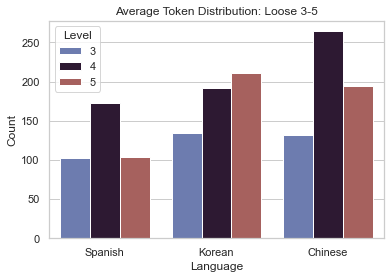

In [114]:
#set seaborn plotting aesthetics
token_loose35=make_df(lspan353,lkor353,lchin353, lspan354,lkor354,lchin354, lspan355,lkor355,lchin355)
sns.set(style='whitegrid')

#create grouped bar chart
sns.barplot(x='Language', y='Count', hue='Level', data=token_loose35, palette='twilight')
plt.title("Average Token Distribution: Loose 3-5")

Text(0.5, 1.0, 'Average Word Type Distribution: Loose 3-5')

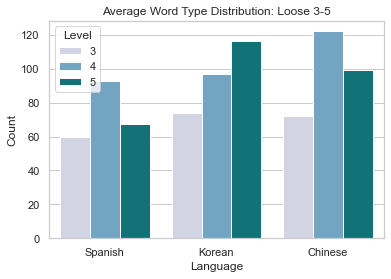

In [115]:
#set seaborn plotting aesthetics
wordtype_loose35=make_df(wspan353, wkor353, wchin353,wspan354, wkor354, wchin354,wspan355, wkor355, wchin355)
sns.set(style='whitegrid')

#create grouped bar chart
sns.barplot(x='Language', y='Count', hue='Level', data=wordtype_loose35, palette='PuBuGn')
plt.title("Average Word Type Distribution: Loose 3-5")

Text(0.5, 1.0, 'Ratio Distribution: Loose 3-5')

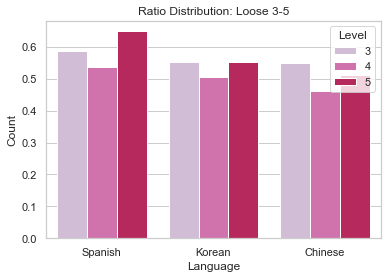

In [116]:
#set seaborn plotting aesthetics
wordtype_loose35=make_df(rspan353, rkor353, rchin353,rspan354, rkor354, rchin354,rspan355, rkor355, rchin355)
sns.set(style='whitegrid')

#create grouped bar chart
sns.barplot(x='Language', y='Count', hue='Level', data=wordtype_loose35, palette='PuRd')
plt.title("Ratio Distribution: Loose 3-5")


# Loose 3-4

In [117]:
#token averages for each level
lspan343, lkor343, lchin343=tokens(textsort_loose,'text3_len','L1',in34_loose, 3)
lspan344, lkor344, lchin344=tokens(textsort_loose,'text3_len','L1',in34_loose, 4)

#word type averages for each level
wspan343, wkor343, wchin343=tokens(textsort_loose,'wordtype_len','L1',in34_loose,3)
wspan344, wkor344, wchin344=tokens(textsort_loose,'wordtype_len','L1',in34_loose,4)

#ratios for each level
rspan343, rkor343, rchin343=ratio(wspan343, wkor343, wchin343, lspan343, lkor343, lchin343)
rspan344, rkor344, rchin344=ratio( wspan344, wkor344, wchin344,lspan344, lkor344, lchin344)

Text(0.5, 1.0, 'Average Token Distribution: Loose 3-4')

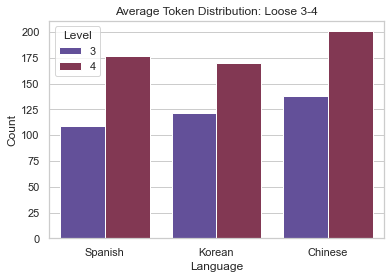

In [118]:
#set seaborn plotting aesthetics
token_loose34=make_df2(lspan343,lkor343,lchin343, lspan344,lkor344,lchin344)
sns.set(style='whitegrid')

#create grouped bar chart
sns.barplot(x='Language', y='Count', hue='Level', data=token_loose34, palette='twilight')
plt.title("Average Token Distribution: Loose 3-4")

Text(0.5, 1.0, 'Average Word Type Distribution: Loose 3-4')

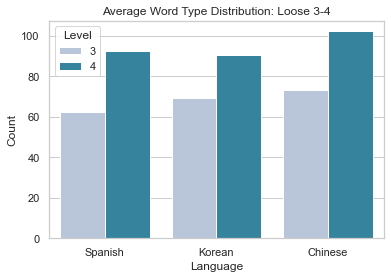

In [119]:
#set seaborn plotting aesthetics
wordtype_loose34=make_df2(wspan343, wkor343, wchin343,wspan344, wkor344, wchin344)
sns.set(style='whitegrid')

#create grouped bar chart
sns.barplot(x='Language', y='Count', hue='Level', data=wordtype_loose34, palette='PuBuGn')
plt.title("Average Word Type Distribution: Loose 3-4")

Text(0.5, 1.0, 'Ratio Distribution: Loose 3-4')

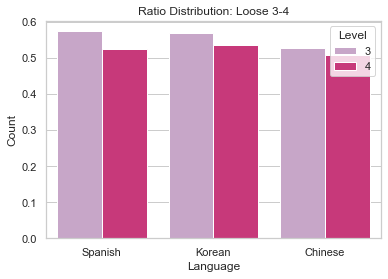

In [120]:
#set seaborn plotting aesthetics
wordtype_loose34=make_df2(rspan343, rkor343, rchin343,rspan344, rkor344, rchin344)
sns.set(style='whitegrid')

#create grouped bar chart
sns.barplot(x='Language', y='Count', hue='Level', data=wordtype_loose34, palette='PuRd')
plt.title("Ratio Distribution: Loose 3-4")

# Loose 4-5

In [121]:
#token averages for each level
lspan454, lkor454, lchin454=tokens(textsort_loose,'text3_len','L1',in45_loose, 4)
lspan455, lkor455, lchin455=tokens(textsort_loose,'text3_len','L1',in45_loose, 5)

#word type averages for each level
wspan454, wkor454, wchin454=tokens(textsort_loose,'wordtype_len','L1',in45_loose,4)
wspan455, wkor455, wchin455=tokens(textsort_loose,'wordtype_len','L1',in45_loose,5)

#ratios for each level
rspan454, rkor454, rchin454=ratio(wspan454, wkor454, wchin454, lspan454, lkor454, lchin454)
rspan455, rkor455, rchin455=ratio( wspan455, wkor455, wchin455,lspan455, lkor455, lchin455)

Text(0.5, 1.0, 'Average Token Distribution: Loose 4-5')

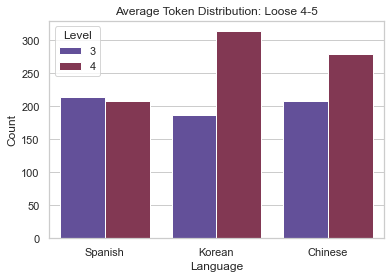

In [122]:
#set seaborn plotting aesthetics
token_loose45=make_df2(lspan454,lkor454,lchin454, lspan455,lkor455,lchin455)
sns.set(style='whitegrid')

#create grouped bar chart
sns.barplot(x='Language', y='Count', hue='Level', data=token_loose45, palette='twilight')
plt.title("Average Token Distribution: Loose 4-5")

Text(0.5, 1.0, 'Average Word Type Distribution: Loose 4-5')

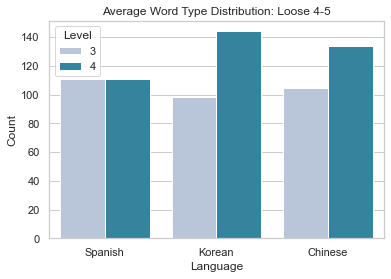

In [123]:
#set seaborn plotting aesthetics
wordtype_loose45=make_df2(wspan454, wkor454, wchin454,wspan455, wkor455, wchin455)
sns.set(style='whitegrid')

#create grouped bar chart
sns.barplot(x='Language', y='Count', hue='Level', data=wordtype_loose45, palette='PuBuGn')
plt.title("Average Word Type Distribution: Loose 4-5")

Text(0.5, 1.0, 'Ratio Distribution: Loose 4-5')

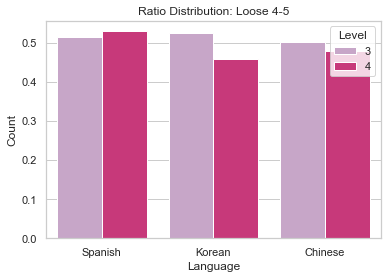

In [124]:
#set seaborn plotting aesthetics
wordtype_loose45=make_df2(rspan454, rkor454, rchin454,rspan455, rkor455, rchin455)
sns.set(style='whitegrid')

#create grouped bar chart
sns.barplot(x='Language', y='Count', hue='Level', data=wordtype_loose45, palette='PuRd')
plt.title("Ratio Distribution: Loose 4-5")

# Whole 3-5

In [125]:
#token averages for each level
wtspan353, wtkor353, wtchin353=tokens(sort_sac,'text_len','native_language',all_three,3)
wtspan354, wtkor354, wtchin354=tokens(sort_sac,'text_len','native_language',all_three, 4)
wtspan355, wtkor355, wtchin355=tokens(sort_sac,'text_len','native_language',all_three, 5)

#word type averages for each level
wwspan353, wwkor353, wwchin353=tokens(sort_sac,'text_len','native_language',all_three,3)
wwspan354, wwkor354, wwchin354=tokens(sort_sac,'text_len','native_language',all_three,4)
wwspan355, wwkor355, wwchin355=tokens(sort_sac,'text_len','native_language',all_three,5)

#ratios for each level
rspan353, rkor353, rchin353=ratio(wtspan353, wtkor353, wtchin353, wwspan353, wwkor353, wwchin353)
rspan354, rkor354, rchin354=ratio(wtspan354, wtkor354, wtchin354, wwspan354, wwkor354, wwchin354)
rspan355, rkor355, rchin355=ratio( wtspan355, wtkor355, wtchin355,wwspan355, wwkor355, wwchin355)

Text(0.5, 1.0, 'Average Word Type Distribution: Whole 3-5')

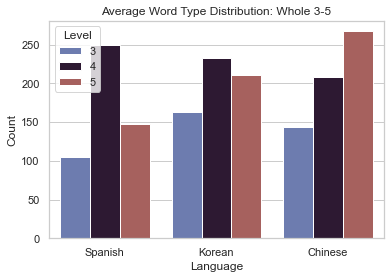

In [126]:
#set seaborn plotting aesthetics
wordtype_whole35=make_df(wtspan353, wtkor353, wtchin353,wtspan354, wtkor354, wtchin354,wtspan355, wtkor355, wtchin355)
sns.set(style='whitegrid')

#create grouped bar chart
sns.barplot(x='Language', y='Count', hue='Level', data=wordtype_whole35, palette='twilight')
plt.title("Average Word Type Distribution: Whole 3-5")

# Changes on Tokens Loose

In [127]:
#finds the token average of the given level in the given level group (id_list) for each language
def tokenDiff(df,textlencol,lang, id_list,lvl1, lvl2):
    index=0
    #total token count for first lvl
    spanish=0
    chinese=0
    korean=0
    #total token count for first second lvl
    spanish2=0
    chinese2=0
    korean2=0
    #number of questions
    qcounts=0
    qcountc=0
    qcountk=0
    #number of questions for second lvl
    qcounts2=0
    qcountc2=0
    qcountk2=0

    for anon in df['anon_id']:
        if df.at[index,'level_id']==lvl1 and df.at[index,'anon_id'] in id_list:
            textlen=df.at[index,textlencol]
            textlen=int(textlen)
            if df.at[index,lang]=='Spanish':
                spanish+=textlen
                qcounts+=1
            elif df.at[index,lang]=='Korean':
                korean+=textlen
                qcountk+=1
            elif df.at[index,lang]=='Chinese':
                chinese+=textlen
                qcountc+=1
        index+=1
        
    index=0
    for anon in df['anon_id']:
        if df.at[index,'level_id']==lvl2 and df.at[index,'anon_id'] in id_list:
            textlen=df.at[index,textlencol]
            textlen=int(textlen)
            if df.at[index,lang]=='Spanish':
                spanish2+=textlen
                qcounts2+=1
            elif df.at[index,lang]=='Korean':
                korean2+=textlen
                qcountk2+=1
            elif df.at[index,lang]=='Chinese':
                chinese2+=textlen
                qcountc2+=1
        index+=1
    
    #average token count for first lvl
    spanAvg=spanish/qcounts
    korAvg=korean/qcountk
    chinAvg=chinese/qcountc
    # average token count for second lvl
    spanAvg2=spanish2/qcounts2
    korAvg2=korean2/qcountk2
    chinAvg2=chinese2/qcountc2
    
    #absolute percentages
    span=(spanAvg2-spanAvg)/spanAvg
    kor=(korAvg2-korAvg)/korAvg
    chin=(chinAvg2-chinAvg)/chinAvg
    
    print("Spanish Difference: ",span*100)
    print("Korean Difference: ",kor*100)
    print("Chinese Difference: ",chin*100)

In [128]:
print('Loose All Three, Level 3 and 4')

tokenDiff(textsort_loose,'text3_len','L1',all_three_loose,3,4)

Loose All Three, Level 3 and 4
Spanish Difference:  69.4499017681729
Korean Difference:  42.37918215613383
Chinese Difference:  100.384236453202


In [129]:
print('Loose All Three, Level 4 and 5')

tokenDiff(textsort_loose,'text3_len','L1',all_three_loose,4,5)

Loose All Three, Level 4 and 5
Spanish Difference:  -39.51690821256039
Korean Difference:  10.182767624020887
Chinese Difference:  -26.294618712817748


In [130]:
print('Loose 3-4')

tokenDiff(textsort_loose,'text3_len','L1',in34_loose,3,4)

Loose 3-4
Spanish Difference:  62.246148459383754
Korean Difference:  39.682757015424016
Chinese Difference:  45.09520366353336


In [131]:
print('Loose 4-5')

tokenDiff(textsort_loose,'text3_len','L1',in45_loose,4,5)

Loose 4-5
Spanish Difference:  -2.8131868131868187
Korean Difference:  68.00195459900233
Chinese Difference:  33.79605491445198


# Changes on Word Types Loose

In [132]:
print('Loose All Three, Level 3 and 4')

tokenDiff(textsort_loose,'wordtype_len','L1',all_three_loose,3,4)

Loose All Three, Level 3 and 4
Spanish Difference:  55.53691275167786
Korean Difference:  30.61797752808988
Chinese Difference:  69.00269541778977


In [133]:
print('Loose All Three, Level 4 and 5')

tokenDiff(textsort_loose,'wordtype_len','L1',all_three_loose,4,5)

Loose All Three, Level 4 and 5
Spanish Difference:  -27.004674577490107
Korean Difference:  20.258064516129032
Chinese Difference:  -18.589181286549707


In [134]:
print('Loose 3-4')

tokenDiff(textsort_loose,'wordtype_len','L1',in34_loose,3,4)

Loose 3-4
Spanish Difference:  48.342857142857135
Korean Difference:  31.360768819047262
Chinese Difference:  39.91488068095455


In [135]:
print('Loose 4-5')

tokenDiff(textsort_loose,'wordtype_len','L1',in45_loose,4,5)

Loose 4-5
Spanish Difference:  -0.0189621389292767
Korean Difference:  46.55737525692045
Chinese Difference:  27.48211154477065


# Changes on Tokens Whole

In [136]:
print('Whole All Three, Level 3 and 4')

tokenDiff(sort_sac,'text_len','native_language',all_three,3,4)

Whole All Three, Level 3 and 4
Spanish Difference:  136.9056082549613
Korean Difference:  42.06426252831459
Chinese Difference:  44.86560025621378


In [137]:
print('Whole All Three, Level 4 and 5')

tokenDiff(sort_sac,'text_len','native_language',all_three,4,5)

Whole All Three, Level 4 and 5
Spanish Difference:  -40.93371402114361
Korean Difference:  -9.389181283989105
Chinese Difference:  28.514613968162305


In [138]:
print('Whole 3-4')

tokenDiff(sort_sac,'text_len','native_language',lvls34,3,4)

Whole 3-4
Spanish Difference:  132.00835659745974
Korean Difference:  49.390112556630726
Chinese Difference:  43.88121899362154


In [139]:
print('Whole 4-5')

tokenDiff(sort_sac,'text_len','native_language',lvls45,4,5)

Whole 4-5
Spanish Difference:  -8.096066544920584
Korean Difference:  19.13463924118652
Chinese Difference:  25.491206092506648


# Changes on Word Type Whole

In [140]:
print('Whole All Three, Level 3 and 4')

tokenDiff(sort_sac,'wordtype_len','native_language',all_three,3,4)

Whole All Three, Level 3 and 4
Spanish Difference:  92.19944830475924
Korean Difference:  30.1313721663568
Chinese Difference:  30.36163377479852


In [141]:
print('Whole All Three, Level 4 and 5')

tokenDiff(sort_sac,'wordtype_len','native_language',all_three,4,5)

Whole All Three, Level 4 and 5
Spanish Difference:  -27.220405493786792
Korean Difference:  -9.51666809495243
Chinese Difference:  21.50324017540189


In [142]:
print('Whole 3-4')

tokenDiff(sort_sac,'wordtype_len','native_language',lvls34,3,4)

Whole 3-4
Spanish Difference:  89.62471681386873
Korean Difference:  34.69481111162761
Chinese Difference:  35.02837004654185


In [143]:
print('Whole 4-5')

tokenDiff(sort_sac,'wordtype_len','native_language',lvls45,4,5)

Whole 4-5
Spanish Difference:  -4.008090992577665
Korean Difference:  11.973869219305417
Chinese Difference:  16.791588701698753


# Vocabulary Sophistication

In [144]:
#ranked word list containing most commonly used words in the English language
word_list=pd.read_csv("unigram_freq.csv")

In [145]:
word_list

,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698
...,...,...
333328,gooek,12711
333329,gooddg,12711
333330,gooblle,12711
333331,gollgo,12711


In [146]:
#creates a list of words from the word_list df
def thousandcount(df, word_list, count,limit):
    while(count<limit):
        word=str(df.iat[count,0])
        word_list.append(word)
        count+=1
    return count

In [147]:
#creating list of the first,second,third, etc thousand words in the most common words list
firstk,secondk,thirdk,fourthk,fifthk,sixthk,seventhk,eighthk,ninthk,tenthk,rest=[],[],[],[],[],[],[],[],[],[],[]
count=0

count=thousandcount(word_list,firstk,count,1000)
count=thousandcount(word_list,secondk,count,2000)
count=thousandcount(word_list, thirdk, count,3000)
count=thousandcount(word_list, fourthk, count,4000)
count=thousandcount(word_list, fifthk, count,5000)
count=thousandcount(word_list, sixthk, count,6000)
count=thousandcount(word_list, seventhk, count,7000)
count=thousandcount(word_list,eighthk,count, 8000)
count=thousandcount(word_list,ninthk,count,9000)
count=thousandcount(word_list,tenthk,count, 10000)
count=thousandcount(word_list,rest,count,333333)

In [148]:
#testing
text="the of a stuff online stuff glapagos"
twords=[]
words=text.strip().split(" ")
for word in words:
    if word in firstk:
        twords.append(word)
print(twords)
len(twords)

['the', 'of', 'a', 'stuff', 'online', 'stuff']


6

In [149]:
#creating a list of all the ids in all the groups
all_groups=[]
for i in all_three: # and lvls34 and lvls45:
    if i not in all_groups:
        all_groups.append(i)
for i in lvls34:
    if i not in all_groups:
        all_groups.append(i)
for i in lvls45:
    if i not in all_groups:
        all_groups.append(i)

In [150]:
#removing the ids that aren't in any of the level groups
sort_sac=sort_sac.drop(columns=['index','answer_id'])
just_groups=sort_sac.copy()
drops=[]
ind=0
for i in sort_sac['anon_id']:
    if i not in all_groups:
        drops.append(ind)
    ind+=1

just_groups=just_groups.drop(labels=drops,axis=0).reset_index()
just_groups

,index,anon_id,native_language,text_len,text,level_id,processed_text,wordtype_len
0,60,aa8,Korean,770,College students are usually very busy during ...,5,college students are usually very busy during ...,232
1,61,aa8,Korean,64,I think it is strange to throw away something ...,4,i think it is strange to throw away something ...,51
2,62,aa8,Korean,809,College students are usually very busy during ...,5,college students are usually very busy during ...,237
3,63,aa8,Korean,343,I thought this was homework. \nT.T I could not...,5,i thought this was homework tt i could not th...,150
4,64,aa8,Korean,137,I. I think using a schedule book is a good way...,5,i i think using a schedule book is a good way ...,63
...,...,...,...,...,...,...,...,...
5221,17074,hb4,Korean,397,Cats and dogs are the most popular pets in the...,4,cats and dogs are the most popular pets in the...,172
5222,17075,hb4,Korean,440,Cats and dogs are the most popular pets in the...,4,cats and dogs are the most popular pets in the...,183
5223,17076,hb4,Korean,405,"Global Warming\n\nIn the greenhouse, plants ca...",4,global warming in the greenhouse plants can l...,199
5224,17077,hb4,Korean,110,"My hometown is Seoul, which is capital city of...",4,my hometown is seoul which is capital city of ...,70


In [184]:
#will create a list of words out of the answer text then check those words with whatever thousand list is passed
#if a word from the answer is also in the thousand list, then it's added to a list. the length of this list is
#the number of words from the thousands list that occurs in the answer text and that's appended to a new column for the thousand list
def vocSophCols(df, col_name, col2_name, text_col, thouslist):
    index=0
    df[col_name]=pd.NaT
    df[col2_name]=pd.NaT
    df["Words "+col2_name]=pd.NaT
    for text in df[text_col]:
        twords=[]
        uwords=[]
        words=[]
        words=text.strip().split(" ")
        for word in words:
            if word in thouslist:
                twords.append(word)
                if word not in uwords:
                    uwords.append(word)
        df.at[index,col_name]=len(twords)
        df.at[index,col2_name]=len(uwords)
        df.at[index,"Words "+col2_name]=str(uwords)
        index+=1

In [188]:
vocSophCols(just_groups, '1k','WT 1k','processed_text',firstk)
vocSophCols(just_groups,'2k','WT 2k','processed_text',secondk)
vocSophCols(just_groups,'3k','WT 3k','processed_text',thirdk)
vocSophCols(just_groups,'4k','WT 4k','processed_text',fourthk)
vocSophCols(just_groups,'5k','WT 5k','processed_text',fifthk)
vocSophCols(just_groups,'6k','WT 6k','processed_text',sixthk)
vocSophCols(just_groups,'7k','WT 7k','processed_text',seventhk)
vocSophCols(just_groups,'8k','WT 8k','processed_text',eighthk)
vocSophCols(just_groups,'9k','WT 9k','processed_text',ninthk)
vocSophCols(just_groups,'10k','WT 10k','processed_text',tenthk)
    

In [189]:
just_groups

,index,anon_id,native_language,text_len,text,level_id,processed_text,wordtype_len,1k,2k,...,WT 6k,Words WT 6k,WT 7k,Words WT 7k,WT 8k,Words WT 8k,WT 9k,Words WT 9k,WT 10k,Words WT 10k
0,60,aa8,Korean,770,College students are usually very busy during ...,5,college students are usually very busy during ...,232,606,48,...,3,"['preparing', 'priorities', 'meal']",3,"['homework', 'angry', 'crucial']",2,"['cant', 'scanning']",3,"['quizzes', 'efficiently', 'divide']",3,"['concentrate', 'bother', 'qt']"
1,61,aa8,Korean,64,I think it is strange to throw away something ...,4,i think it is strange to throw away something ...,51,43,7,...,1,['anymore'],0,[],0,[],1,['predict'],0,[]
2,62,aa8,Korean,809,College students are usually very busy during ...,5,college students are usually very busy during ...,237,665,44,...,4,"['priorities', 'remained', 'planner', 'killing']",4,"['homework', 'angry', 'limitation', 'crucial']",3,"['cant', 'nervous', 'organize']",1,['efficiently'],2,"['concentrate', 'bother']"
3,63,aa8,Korean,343,I thought this was homework. \nT.T I could not...,5,i thought this was homework tt i could not th...,150,271,16,...,3,"['tt', 'worry', 'studied']",2,"['homework', 'separately']",2,"['grammar', 'expressions']",0,[],1,['concentrate']
4,64,aa8,Korean,137,I. I think using a schedule book is a good way...,5,i i think using a schedule book is a good way ...,63,108,9,...,2,"['priorities', 'convenient']",0,[],1,['organize'],0,[],0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221,17074,hb4,Korean,397,Cats and dogs are the most popular pets in the...,4,cats and dogs are the most popular pets in the...,172,280,42,...,3,"['humans', 'loves', 'sad']",3,"['similarly', 'offensive', 'admit']",2,"['cant', 'lonely']",1,['differently'],0,[]
5222,17075,hb4,Korean,440,Cats and dogs are the most popular pets in the...,4,cats and dogs are the most popular pets in the...,183,313,40,...,4,"['humans', 'besides', 'loves', 'sad']",2,"['similarly', 'likes']",3,"['lonely', 'aggressive', 'cant']",1,['differently'],0,[]
5223,17076,hb4,Korean,405,"Global Warming\n\nIn the greenhouse, plants ca...",4,global warming in the greenhouse plants can l...,199,241,45,...,4,"['resolve', 'corps', 'coal', 'everywhere']",4,"['filtering', 'mario', 'layers', 'hottest']",1,['cant'],4,"['warming', 'phenomenon', 'rays', 'centuries']",3,"['greenhouse', 'refrigerator', 'ozone']"
5224,17077,hb4,Korean,110,"My hometown is Seoul, which is capital city of...",4,my hometown is seoul which is capital city of ...,70,82,5,...,0,[],0,[],1,['neighbors'],1,['lobby'],1,['hometown']


In [168]:
col_list= ['1k', '2k', '3k', '4k', '5k', '6k', '7k', '8k', '9k', '10k']
col_list

['1k', '2k', '3k', '4k', '5k', '6k', '7k', '8k', '9k', '10k']

In [193]:
index=0
just_groups['10k+']=pd.NaT
for length in just_groups.text_len:
    k1=just_groups.at[index,'1k']
    k2=just_groups.at[index,'2k']
    k3=just_groups.at[index,'3k']
    k4=just_groups.at[index,'4k']
    k5=just_groups.at[index,'5k']
    k6=just_groups.at[index,'6k']
    k7=just_groups.at[index,'7k']
    k8=just_groups.at[index,'8k']
    k9=just_groups.at[index,'9k']
    k10=just_groups.at[index,'10k']
    total=k1+k2+k3+k4+k5+k6+k7+k8+k9+k10
    remaining=length-total
    just_groups.at[index, '10k+']=remaining
    
    lengthwt=just_groups.at[index,'wordtype_len']
    k1wt=just_groups.at[index,'WT 1k']
    k2wt=just_groups.at[index,'WT 2k']
    k3wt=just_groups.at[index,'WT 3k']
    k4wt=just_groups.at[index,'WT 4k']
    k5wt=just_groups.at[index,'WT 5k']
    k6wt=just_groups.at[index,'WT 6k']
    k7wt=just_groups.at[index,'WT 7k']
    k8wt=just_groups.at[index,'WT 8k']
    k9wt=just_groups.at[index,'WT 9k']
    k10wt=just_groups.at[index,'WT 10k']
    totalwt=k1wt+k2wt+k3wt+k4wt+k5wt+k6wt+k7wt+k8wt+k9wt+k10wt
    remainingwt=lengthwt-totalwt
    just_groups.at[index,'WT 10k+']=remainingwt
    index+=1

In [194]:
just_groups

,index,anon_id,native_language,text_len,text,level_id,processed_text,wordtype_len,1k,2k,...,Words WT 6k,WT 7k,Words WT 7k,WT 8k,Words WT 8k,WT 9k,Words WT 9k,WT 10k,Words WT 10k,WT 10k+
0,60,aa8,Korean,770,College students are usually very busy during ...,5,college students are usually very busy during ...,232,606,48,...,"['preparing', 'priorities', 'meal']",3,"['homework', 'angry', 'crucial']",2,"['cant', 'scanning']",3,"['quizzes', 'efficiently', 'divide']",3,"['concentrate', 'bother', 'qt']",14.0
1,61,aa8,Korean,64,I think it is strange to throw away something ...,4,i think it is strange to throw away something ...,51,43,7,...,['anymore'],0,[],0,[],1,['predict'],0,[],5.0
2,62,aa8,Korean,809,College students are usually very busy during ...,5,college students are usually very busy during ...,237,665,44,...,"['priorities', 'remained', 'planner', 'killing']",4,"['homework', 'angry', 'limitation', 'crucial']",3,"['cant', 'nervous', 'organize']",1,['efficiently'],2,"['concentrate', 'bother']",10.0
3,63,aa8,Korean,343,I thought this was homework. \nT.T I could not...,5,i thought this was homework tt i could not th...,150,271,16,...,"['tt', 'worry', 'studied']",2,"['homework', 'separately']",2,"['grammar', 'expressions']",0,[],1,['concentrate'],8.0
4,64,aa8,Korean,137,I. I think using a schedule book is a good way...,5,i i think using a schedule book is a good way ...,63,108,9,...,"['priorities', 'convenient']",0,[],1,['organize'],0,[],0,[],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221,17074,hb4,Korean,397,Cats and dogs are the most popular pets in the...,4,cats and dogs are the most popular pets in the...,172,280,42,...,"['humans', 'loves', 'sad']",3,"['similarly', 'offensive', 'admit']",2,"['cant', 'lonely']",1,['differently'],0,[],12.0
5222,17075,hb4,Korean,440,Cats and dogs are the most popular pets in the...,4,cats and dogs are the most popular pets in the...,183,313,40,...,"['humans', 'besides', 'loves', 'sad']",2,"['similarly', 'likes']",3,"['lonely', 'aggressive', 'cant']",1,['differently'],0,[],13.0
5223,17076,hb4,Korean,405,"Global Warming\n\nIn the greenhouse, plants ca...",4,global warming in the greenhouse plants can l...,199,241,45,...,"['resolve', 'corps', 'coal', 'everywhere']",4,"['filtering', 'mario', 'layers', 'hottest']",1,['cant'],4,"['warming', 'phenomenon', 'rays', 'centuries']",3,"['greenhouse', 'refrigerator', 'ozone']",29.0
5224,17077,hb4,Korean,110,"My hometown is Seoul, which is capital city of...",4,my hometown is seoul which is capital city of ...,70,82,5,...,[],0,[],1,['neighbors'],1,['lobby'],1,['hometown'],3.0


index=0
just_groups['num_in_firstk']=pd.NaT
twords=[]
for text in just_groups.processed_text:
    twords=[]
    words=[]
    words=text.strip().split(" ")
    for word in words:
        if word in firstk:
            twords.append(word)
    just_groups.at[index, 'num_in_firstk']=len(twords)
    index+=1


In [158]:
just_groups

,index,anon_id,native_language,text_len,text,level_id,processed_text,wordtype_len,1k,2k,3k,4k,5k,6k,7k,8k,9k,10k,10k+,num_in_firstk
0,60,aa8,Korean,770,College students are usually very busy during ...,5,college students are usually very busy during ...,232,606,48,30,20,10,4,7,6,7,4,28,606
1,61,aa8,Korean,64,I think it is strange to throw away something ...,4,i think it is strange to throw away something ...,51,43,7,0,4,2,2,0,0,1,0,5,43
2,62,aa8,Korean,809,College students are usually very busy during ...,5,college students are usually very busy during ...,237,665,44,26,23,11,7,7,5,1,2,18,665
3,63,aa8,Korean,343,I thought this was homework. \nT.T I could not...,5,i thought this was homework tt i could not th...,150,271,16,7,13,2,4,6,4,0,1,19,271
4,64,aa8,Korean,137,I. I think using a schedule book is a good way...,5,i i think using a schedule book is a good way ...,63,108,9,4,2,0,2,0,1,0,0,11,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221,17074,hb4,Korean,397,Cats and dogs are the most popular pets in the...,4,cats and dogs are the most popular pets in the...,172,280,42,23,8,18,4,3,6,1,0,12,280
5222,17075,hb4,Korean,440,Cats and dogs are the most popular pets in the...,4,cats and dogs are the most popular pets in the...,183,313,40,27,9,19,7,2,7,2,0,14,313
5223,17076,hb4,Korean,405,"Global Warming\n\nIn the greenhouse, plants ca...",4,global warming in the greenhouse plants can l...,199,241,45,26,13,9,4,4,2,12,12,37,241
5224,17077,hb4,Korean,110,"My hometown is Seoul, which is capital city of...",4,my hometown is seoul which is capital city of ...,70,82,5,9,3,2,0,0,1,1,1,6,82
